In [5]:
import pandas as pd
import os

In [124]:
os.getcwd()

'C:\\Jupyter For Python\\csv'

In [8]:
os.chdir('C:\\Jupyter For Python\\csv')

In [9]:
movies = pd.read_csv('P4-Movie-Ratings.csv')

In [10]:
len(movies)

559

In [11]:
movies.columns

Index(['Film', 'Genre', 'Rotten Tomatoes Ratings %', 'Audience Ratings %',
       'Budget (million $)', 'Year of release'],
      dtype='object')

In [12]:
movies.columns=['Film', 'Genre', 'CriticRating', 'AudienceRating', \
               'Budget', 'Year']

In [13]:
movies.head()

,Film,Genre,CriticRating,AudienceRating,Budget,Year
0,(500) Days of Summer,Comedy,87,81,8,2009
1,"10,000 B.C.",Adventure,9,44,105,2008
2,12 Rounds,Action,30,52,20,2009
3,127 Hours,Adventure,93,84,18,2010
4,17 Again,Comedy,55,70,20,2009


In [14]:
movies.info()
#using categorical data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
Budget            559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [15]:
movies.describe()

,CriticRating,AudienceRating,Budget,Year
count,559.000000,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136,2009.152057
std,26.413091,16.826887,48.731817,1.362632
min,0.000000,0.000000,0.000000,2007.000000
25%,25.000000,47.000000,20.000000,2008.000000
50%,46.000000,58.000000,35.000000,2009.000000
75%,70.000000,72.000000,65.000000,2010.000000
max,97.000000,96.000000,300.000000,2011.000000


In [12]:
movies.Film=movies.Film.astype('category')

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 6 columns):
Film              559 non-null object
Genre             559 non-null object
CriticRating      559 non-null int64
AudienceRating    559 non-null int64
Budget            559 non-null int64
Year              559 non-null int64
dtypes: int64(4), object(2)
memory usage: 26.3+ KB


In [17]:
movies.Genre=movies.Genre.astype('category')

In [18]:
movies.Year=movies.Year.astype('category')

In [19]:
movies.describe()

,CriticRating,AudienceRating,Budget
count,559.000000,559.000000,559.000000
mean,47.309481,58.744186,50.236136
std,26.413091,16.826887,48.731817
min,0.000000,0.000000,0.000000
25%,25.000000,47.000000,20.000000
50%,46.000000,58.000000,35.000000
75%,70.000000,72.000000,65.000000
max,97.000000,96.000000,300.000000


In [20]:
#working on jointplots

In [23]:
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')
sns.set_style('dark')

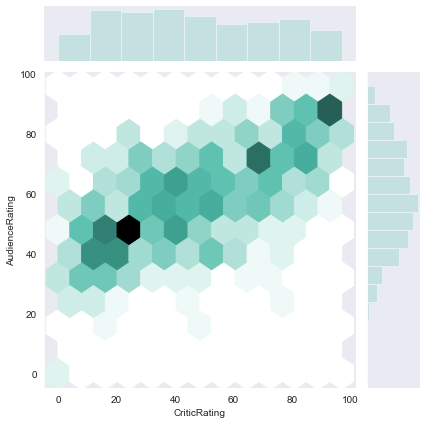

In [24]:
j =sns.jointplot(data=movies,x='CriticRating',y='AudienceRating', kind = 'hex' , )
#kind hex shows the data on hex

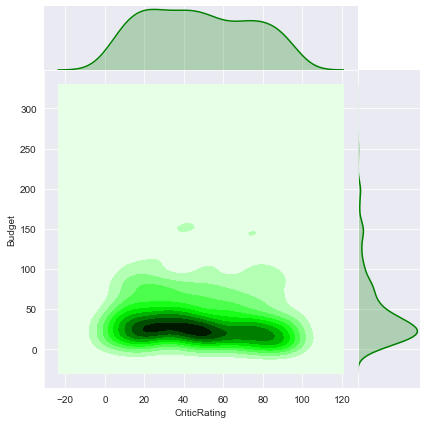

In [125]:
j =sns.jointplot("CriticRating", "Budget", data=movies,
                kind="kde", space=0, color="g" )
#here I created a kde plot

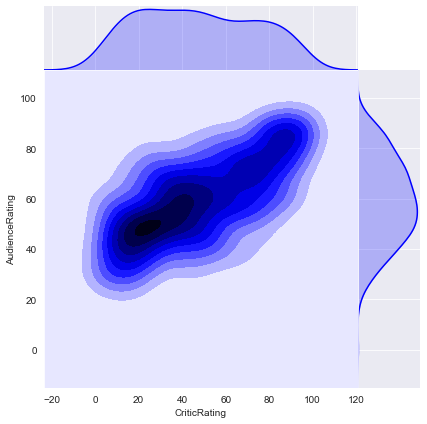

In [21]:
j =(sns.jointplot("CriticRating", "AudienceRating", data=movies,
                kind="kde", space=0, color="b" ).plot_joint(sns.kdeplot, zorder=0, n_levels=6))

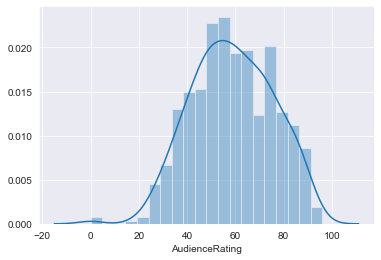

In [22]:
#histograms 
m1=sns.distplot(movies.AudienceRating,bins =20)

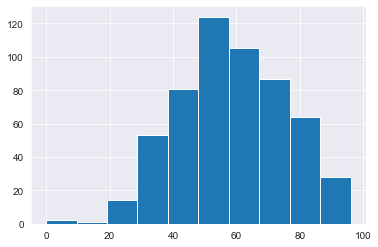

In [23]:
n1 =plt.hist(movies.AudienceRating, bins=10)

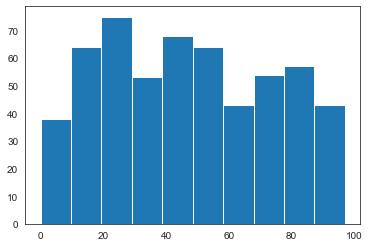

In [24]:
sns.set_style('white')
n1 =plt.hist(movies.CriticRating, bins=10)

In [25]:
#stacked histogram

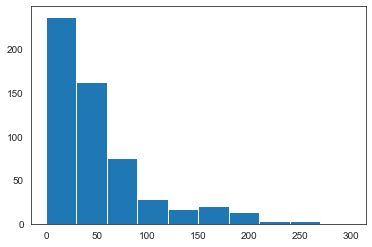

In [26]:
plt.hist(movies.Budget)
plt.show()

In [27]:
# to Filter a dataset use ==
movies[movies.Genre == 'Drama']

,Film,Genre,CriticRating,AudienceRating,Budget,Year
10,88 Minutes,Drama,5,51,30,2007
11,A Dangerous Method,Drama,79,89,20,2011
13,A Serious Man,Drama,89,64,7,2009
18,Albert Nobbs,Drama,53,43,8,2011
23,All Good Things,Drama,33,64,20,2010
...,...,...,...,...,...,...
529,War Horse,Drama,77,73,66,2011
532,Water For Elephants,Drama,60,72,38,2011
534,We Own the Night,Drama,55,63,21,2007
541,Whip It,Drama,84,73,15,2009


In [28]:
movies[movies.Genre == 'Drama'].Budget

10     30
11     20
13      7
18      8
23     20
       ..
529    66
532    38
534    21
541    15
545     2
Name: Budget, Length: 101, dtype: int64

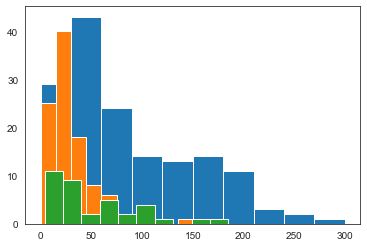

In [29]:
plt.hist(movies[movies.Genre == 'Action'].Budget, bins=10)
plt.hist(movies[movies.Genre == 'Drama'].Budget, bins=10)
plt.hist(movies[movies.Genre == 'Thriller'].Budget, bins=10)
plt.show()
#here we have plottd 3 histograms that have Budget of Movies with Drama,action and thriller genre

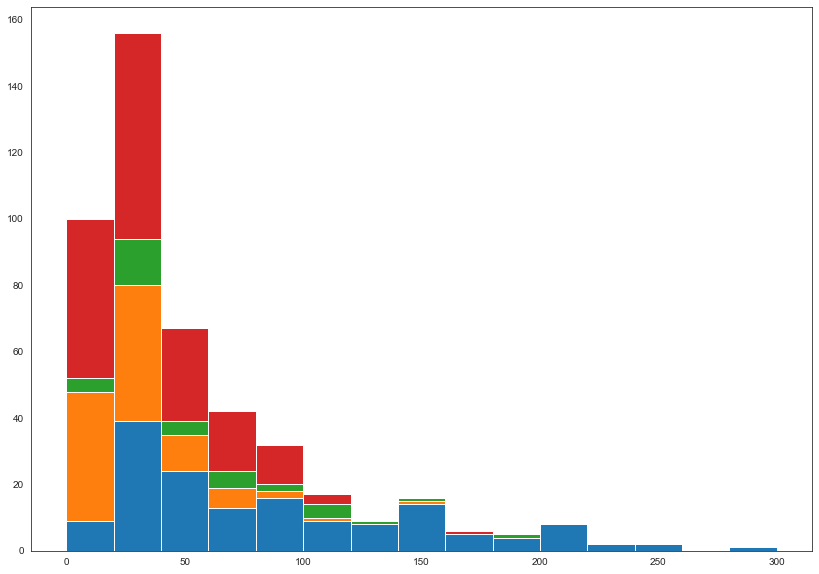

In [42]:
plt.hist([movies[movies.Genre == 'Action'].Budget , \
          movies[movies.Genre == 'Drama'].Budget, \
          movies[movies.Genre == 'Thriller'].Budget , \
          movies[movies.Genre == 'Comedy'].Budget], \
         bins=15,stacked=True)
plt.show()
#here we have created a stacked histgram with the different genres that are available

In [43]:
#using iteration of genre
#movies.Genre.cat.categories shows the various genres as the datatype is now categorical 
for i in movies.Genre.cat.categories:
    print (i)
    
#this shows how we can iterate over a column

Action
Adventure
Comedy
Drama
Horror
Romance
Thriller


In [32]:
list1=[] #creates an empty list
for i in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == i].Budget)
list1

[2       20
 5      200
 15      35
 29      20
 30      20
       ... 
 531    130
 542     35
 546    150
 547    160
 557     24
 Name: Budget, Length: 154, dtype: int64, 1      105
 3       18
 19     200
 21      45
 24      40
 32      78
 46      20
 65      38
 68     140
 130     73
 165     12
 166    125
 167    250
 168    150
 176     36
 178    150
 192     70
 193     60
 241     60
 272     37
 341     19
 363     70
 386    130
 401    155
 459     59
 463     25
 506     38
 540    100
 548     60
 Name: Budget, dtype: int64, 0       8
 4      20
 6      30
 8      28
 9       8
        ..
 552    80
 553    22
 554    50
 555    18
 558    80
 Name: Budget, Length: 172, dtype: int64, 10     30
 11     20
 13      7
 18      8
 23     20
        ..
 529    66
 532    38
 534    21
 541    15
 545     2
 Name: Budget, Length: 101, dtype: int64, 7      32
 12     35
 20     40
 28      5
 59     26
 88     10
 97     25
 100    30
 103    50
 109    20
 126    40
 135  

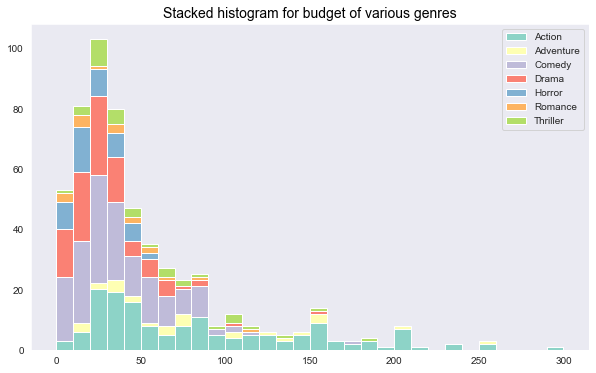

In [26]:
plt.rcParams['figure.figsize']=10,6
list1=[] #creates an empty list
mylabels=[] #creates an empty list with the lables 
for i in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == i].Budget)#itrrates through the genres appends the emplty list 
    mylabels.append(i)#creates a list of labels by iterating through the Genres

h =plt.hist(list1, bins=30, stacked=True,rwidth=1, label=mylabels) #
plt.legend(loc='upper right', bbox_to_anchor =(1,1))#creates the legend 
plt.title('Stacked histogram for budget of various genres',c='k',size=14)
plt.savefig('stackedhist.pdf')
plt.show()

In [46]:
#kde plot  
sns.set_style('darkgrid')

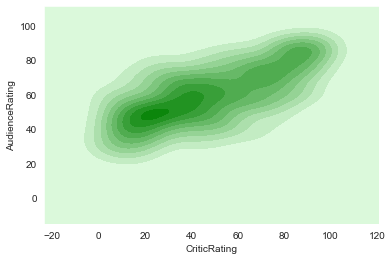

In [140]:
sns.kdeplot(movies.CriticRating, movies.AudienceRating,shade =True,color='g')
plt.show()

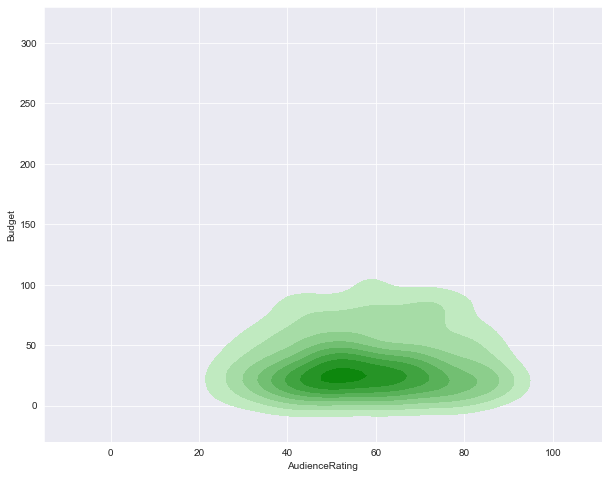

In [58]:

sns.kdeplot(movies.AudienceRating, movies.Budget, shade=True, shade_lowest=False,color='g')

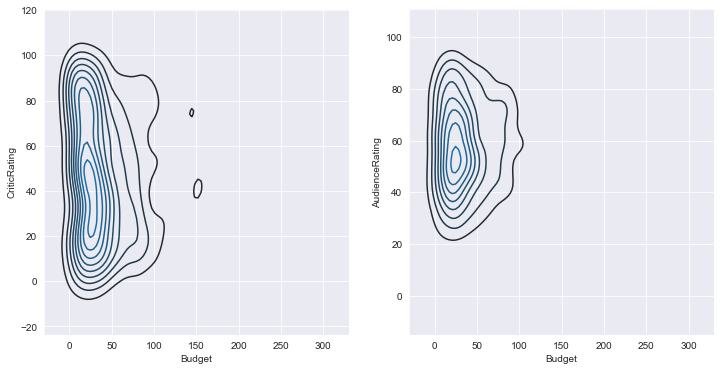

In [69]:
#working with subplots
f, axes = plt.subplots(1,2 , figsize =(12,6)) #1 row, 4 columns
k1 = sns.kdeplot(movies.Budget, movies.AudienceRating, ax =axes[1]) # plots a kde plot with axes 0
k2 = sns.kdeplot(movies.Budget, movies.CriticRating, ax= axes[0]) # plots a kde plot with axes 0

[(-20, 180)]

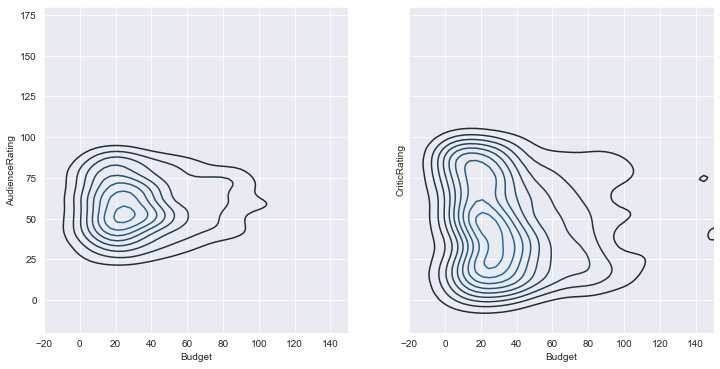

In [93]:
#working with subplots
f, axes = plt.subplots(1,2 , figsize =(12,6), sharex=True, sharey =True) #1 row, 4 columns
k1 = sns.kdeplot(movies.Budget, movies.AudienceRating, ax =axes[0]) # plots a kde plot with axes 0
k2 = sns.kdeplot(movies.Budget, movies.CriticRating, ax= axes[1]) # plots a kde plot with axes 0
k1.set(xlim=(-20,150))# sets the limits of the x axis
k2.set(ylim=(-20,180))

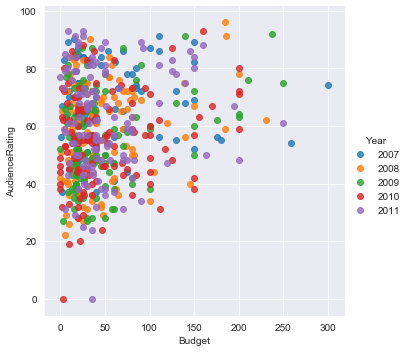

In [81]:
#refresher on lmplots
sns.lmplot(data=movies, x='Budget', y='AudienceRating',fit_reg=False,hue='Year')

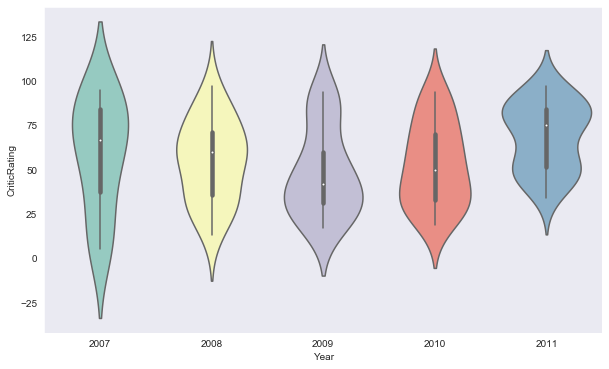

In [30]:
#violin plots
sns.violinplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

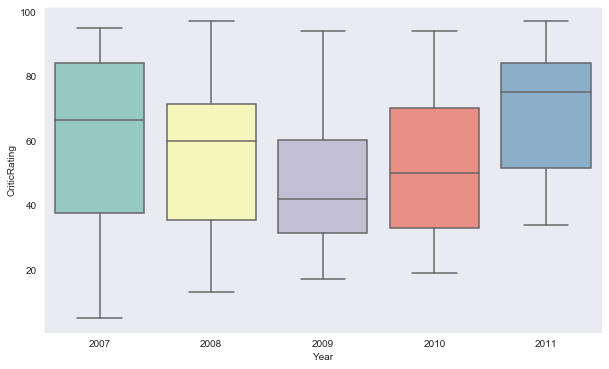

In [31]:
#violin plots
sns.boxplot(data=movies[movies.Genre == 'Drama'], x='Year', y='CriticRating')

In [27]:
pwd

'C:\\Jupyter For Python\\csv'

In [203]:
#facet grip 
@g=sns.FacetGrid(movies,row='Genre', col= 'Year',hue='Genre')

SyntaxError: invalid syntax (<ipython-input-203-8f3e66db7dfa>, line 2)

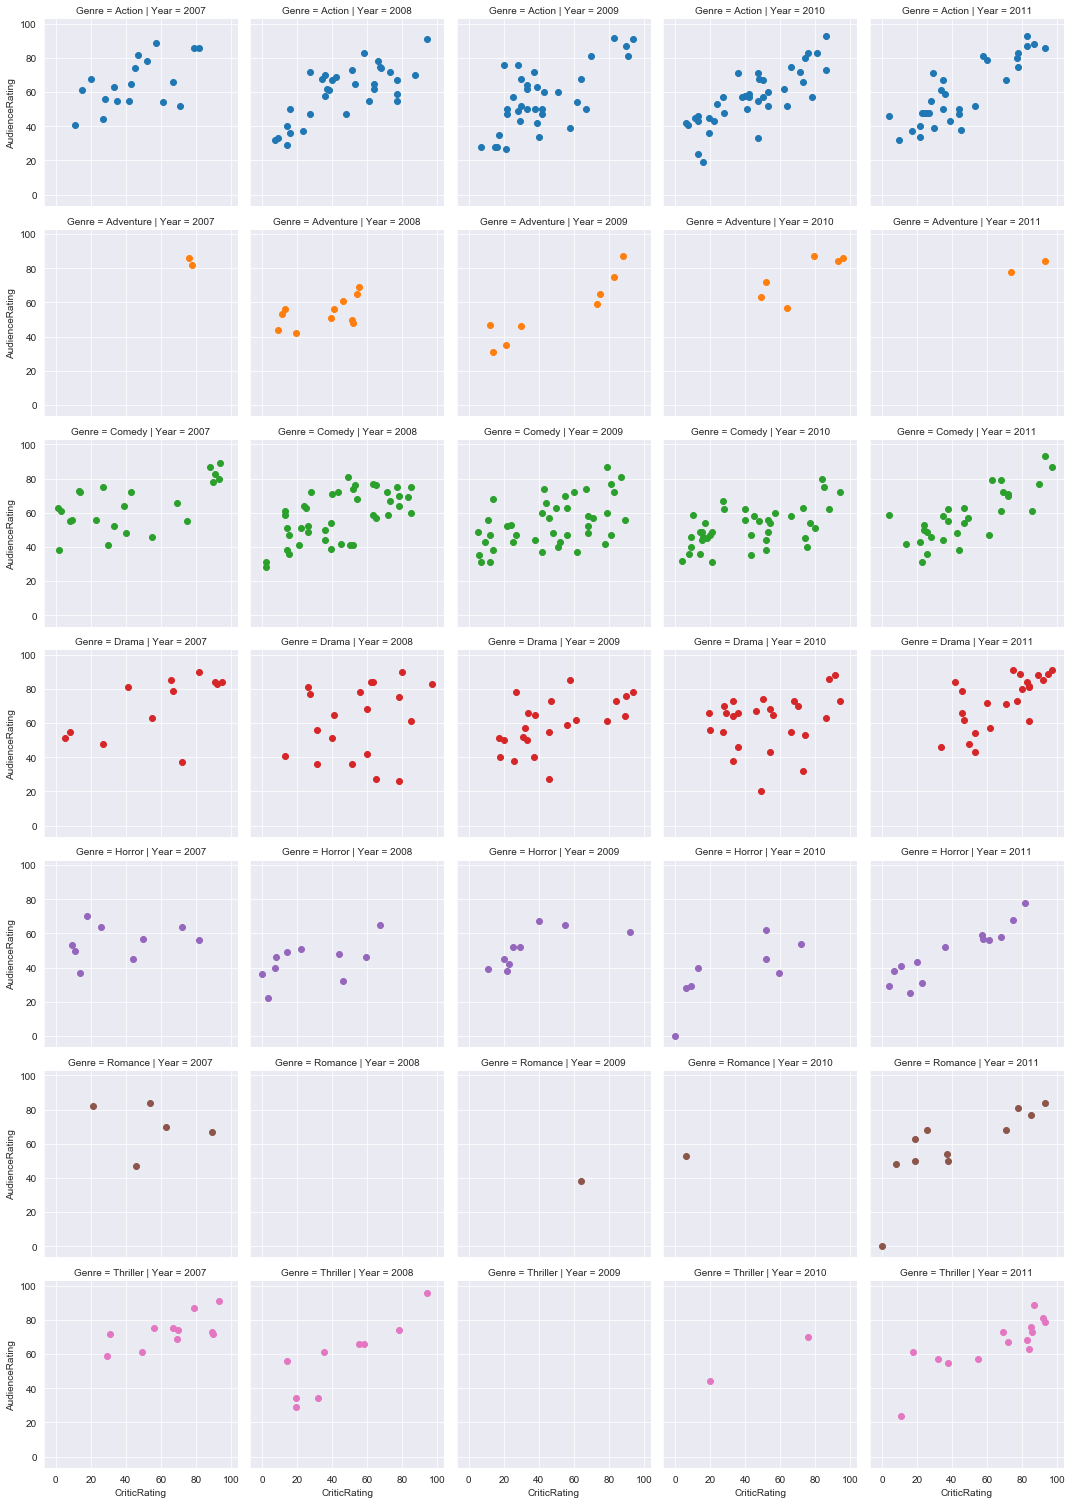

In [103]:
g=sns.FacetGrid(movies,row='Genre', col= 'Year',hue='Genre')#we are making facet grids with rows as genre and columns as years
g.map(plt.scatter, 'CriticRating','AudienceRating')

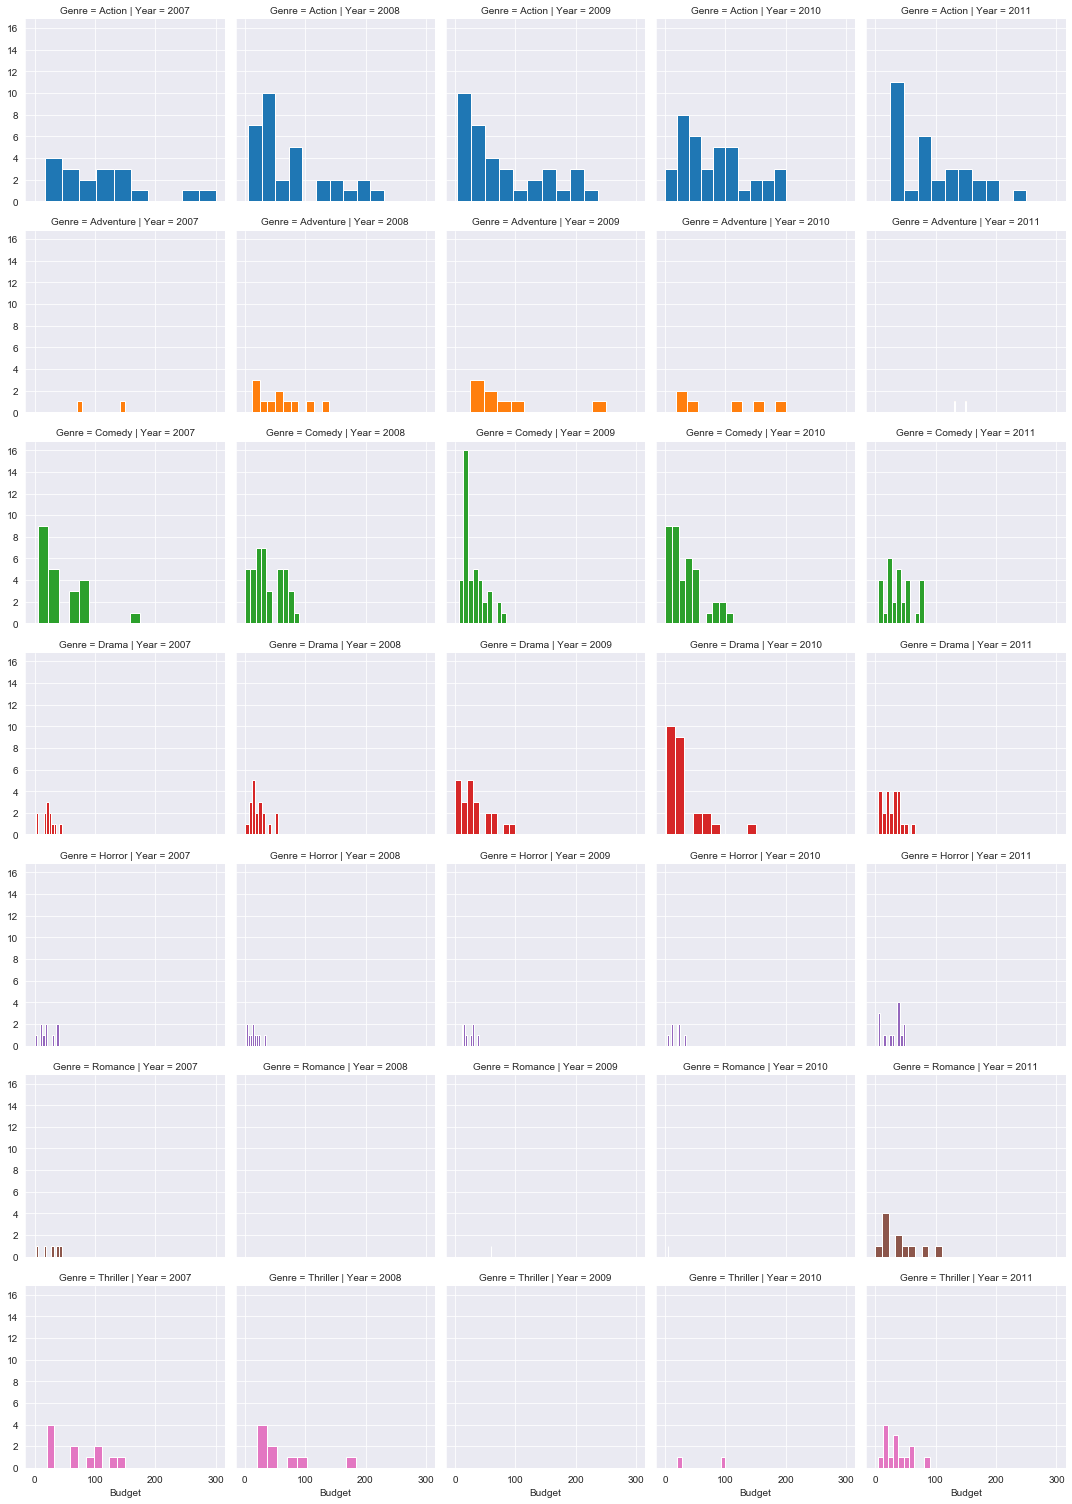

In [113]:
#can be used on any plot
g=sns.FacetGrid(movies,row='Genre', col= 'Year',hue='Genre')#we are making facet grids with rows as genre and columns as years
g.map(plt.hist, 'Budget', bins=10)

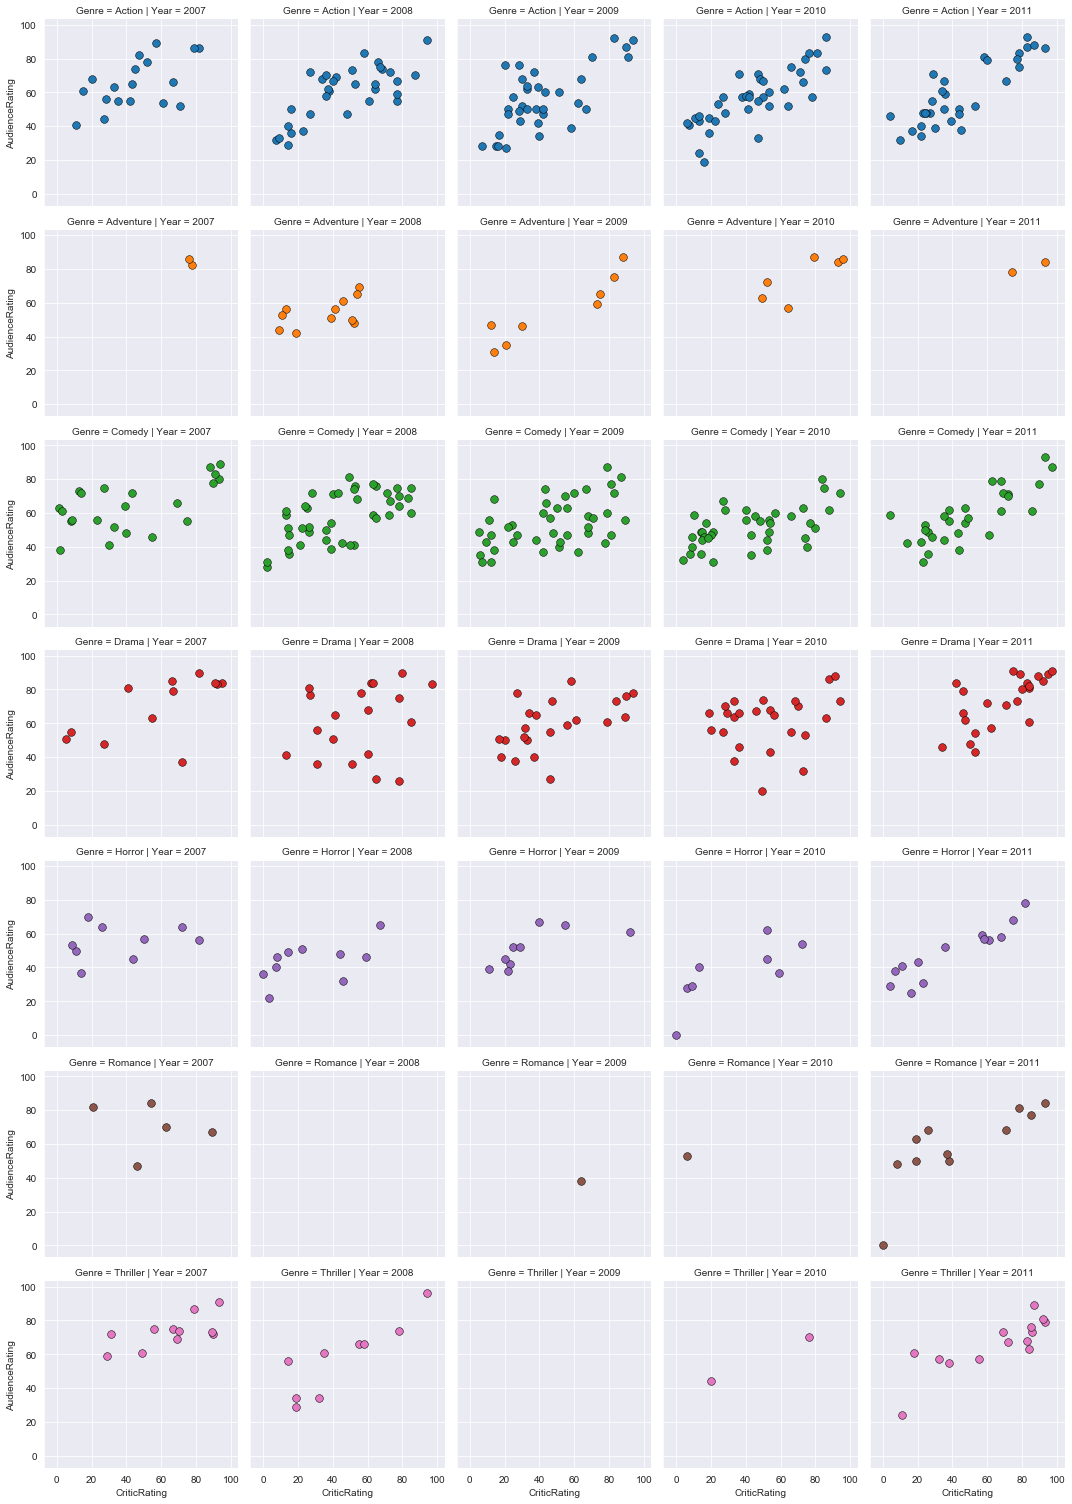

In [117]:
#can be used on any plot
g=sns.FacetGrid(movies,row='Genre', col= 'Year',hue='Genre')#we are making facet grids with rows as genre and columns as years
kws = dict(s=60, linewidth =0.5, edgecolor='black')
g.map(plt.scatter, 'CriticRating','AudienceRating', **kws)

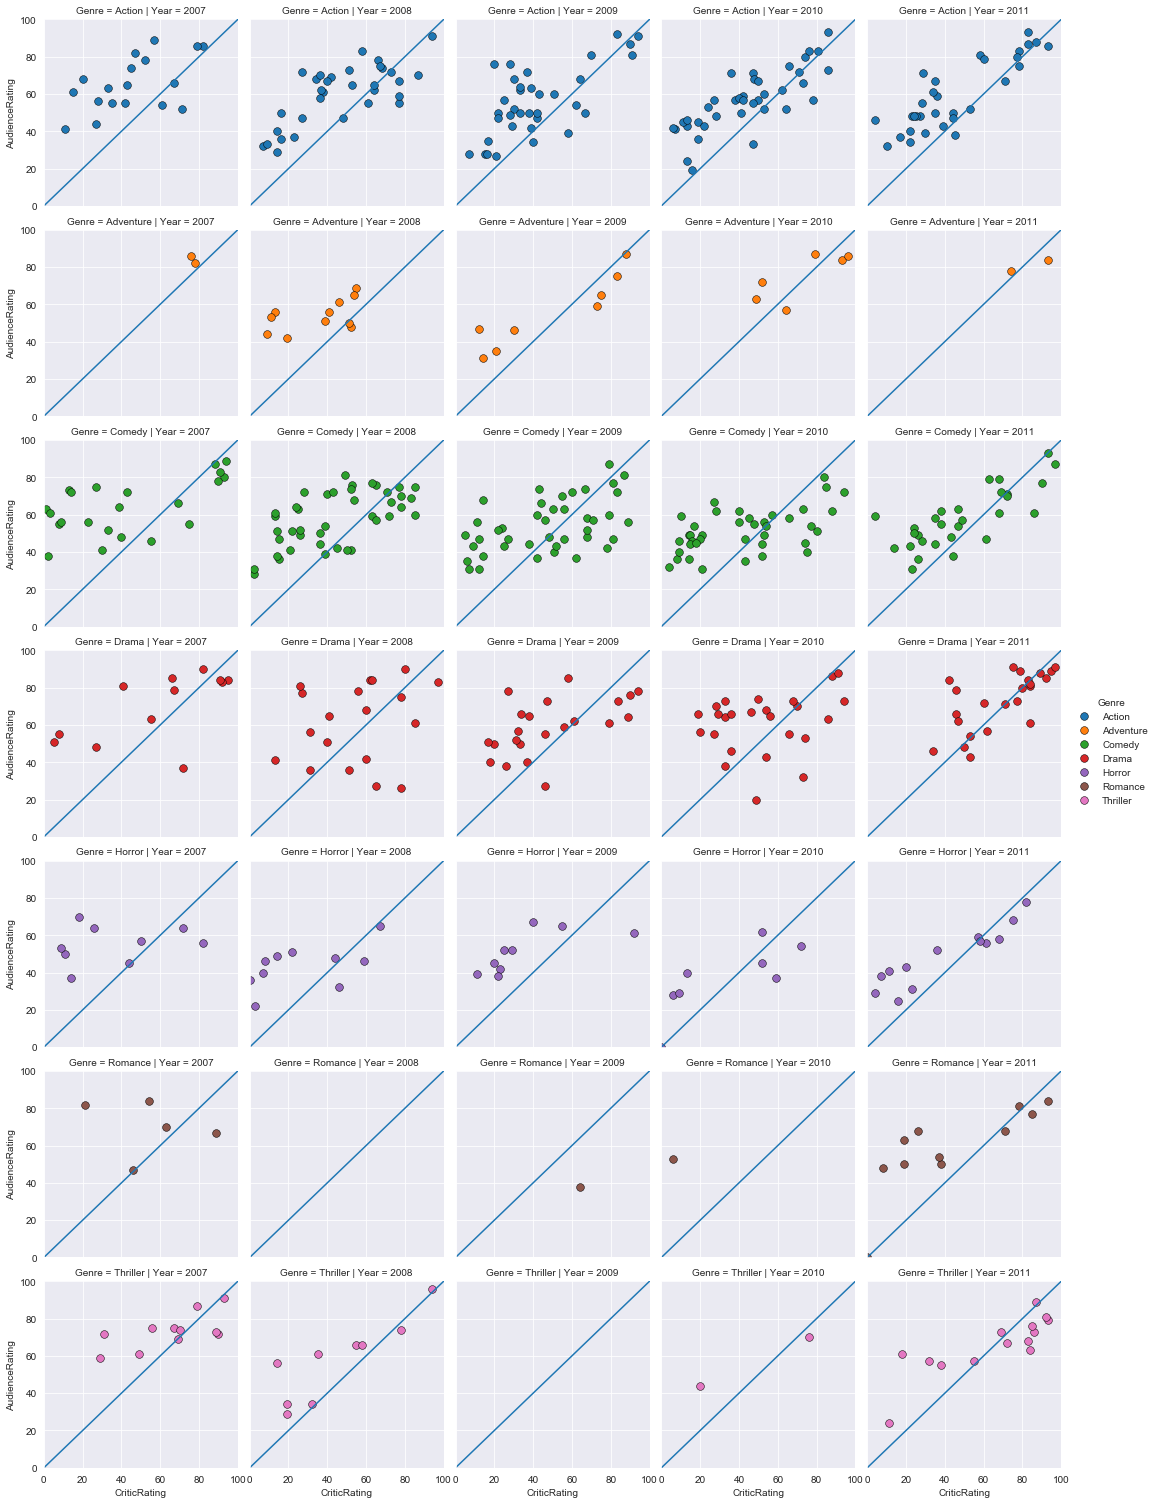

In [126]:
#controling axes and adding diagonals 
#can be used on any plot
g=sns.FacetGrid(movies,row='Genre', col= 'Year',hue='Genre')#we are making facet grids with rows as genre and columns as years
kws = dict(s=60, linewidth =0.5, edgecolor='black')
g.map(plt.scatter, 'CriticRating','AudienceRating', **kws)
g.set(xlim=(0,100), ylim=(0,100))
for ax in g.axes.flat:
    ax.plot((0,100),(0,100))
g.add_legend()

---

In [122]:
#building dashboards
#this is a combination of two or more figures

In [128]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline 
import warnings 
warnings.filterwarnings('ignore')

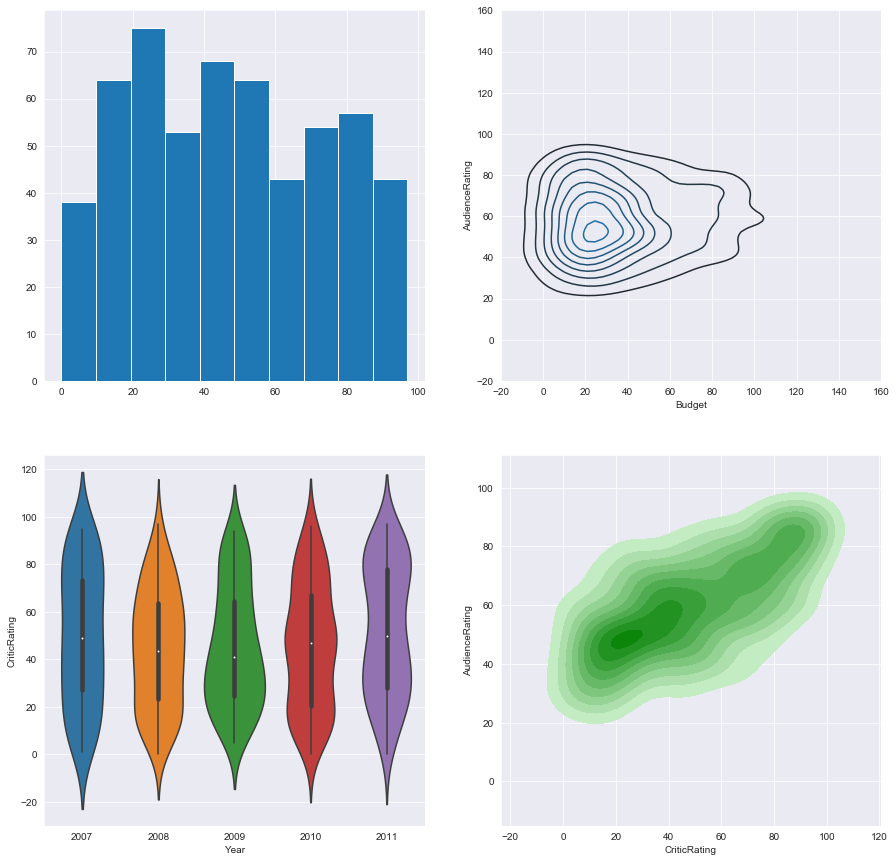

In [193]:
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize=(15,15))
k1 = sns.kdeplot(movies.Budget,movies.AudienceRating,ax=axes[0,1])#top left chart
k2 = axes[0,0].hist(movies.CriticRating)
k1.set(xlim=(-20,160), ylim =(-20,160))
z1= sns.violinplot(data=movies, x='Year', y='CriticRating',ax=axes[1,0])
z2 =sns.kdeplot(movies.CriticRating, movies.AudienceRating,shade =True,shade_lowest=False,color='g',ax=axes[1,1])
plt.show()
#for non seaborn plots you can't plot them together with the others 
#we place the axes before the line like the hist above.

---

In [149]:
#styling a dashbord

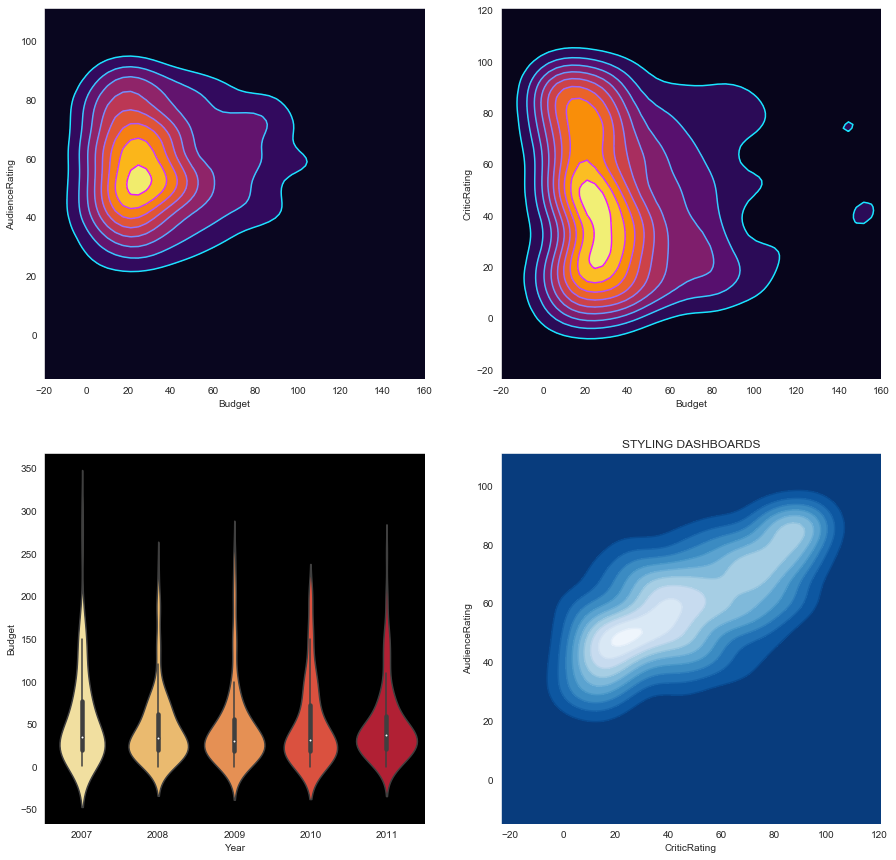

In [201]:
sns.set_style('dark', {"axes.facecolor":"black"}) #others are white,whitegrid,dark and darkgrid , ticks
# {"axes.facecolor":"black"} creates the black background
f, axes = plt.subplots(2,2, figsize=(15,15))
plt.title('STYLING DASHBOARDS')
#plot 0,0
k1 = sns.kdeplot(movies.Budget,movies.AudienceRating,ax=axes[0,0], \
                shade=True, shade_lowest=True, cmap='inferno')#top left chart
#combines with and without shading
#use the cmap method to change the color maps 
#use the colors with _r to reverse the color map sequence
k1b = sns.kdeplot(movies.Budget,movies.AudienceRating,ax=axes[0,0],cmap='cool')#top left chart



#plot 0,1
k2 = sns.kdeplot(movies.Budget,movies.CriticRating,ax=axes[0,1],shade=True, shade_lowest=True,cmap='inferno')
k2 = sns.kdeplot(movies.Budget,movies.CriticRating,ax=axes[0,1],cmap='cool')
k1.set(xlim=(-20,160))
k2.set(xlim =(-20,160))
#plot 1,1
z1= sns.violinplot(data=movies, x='Year', y='Budget',ax=axes[1,0], \
      palette='YlOrRd')#palett gives the violin posts 

#plot 1,0
z2 =sns.kdeplot(movies.CriticRating, movies.AudienceRating,shade =True,shade_lowest=True,ax=axes[1,1],cmap='Blues_r')

z2b = sns.kdeplot(movies.CriticRating, movies.AudienceRating,ax=axes[1,1],cmap='Blues_r')
plt.show()

#for non seaborn plots you can't plot them together with the others 
#we place the axes before the line like the hist above.

---

In [204]:
#finishing up

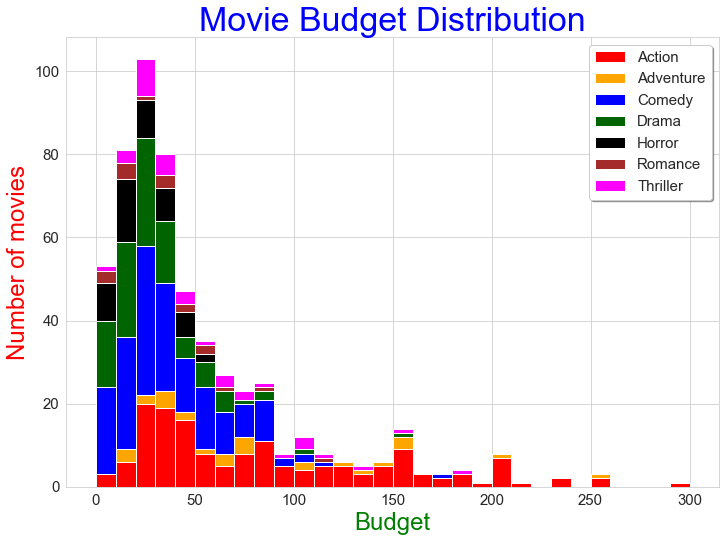

In [231]:
#plt.rcParams['figure.figsize']=10,6
list1=[] #creates an empty list
mylabels=[] #creates an empty list with the lables 
for i in movies.Genre.cat.categories:
    list1.append(movies[movies.Genre == i].Budget)#itrrates through the genres appends the emplty list 
    mylabels.append(i)#creates a list of labels by iterating through the Genres

#sns.set_style('whitegrid')
fig,ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
h =plt.hist(list1, bins=30, stacked=True,rwidth=1, label=mylabels, 
            color=('Red','Orange','Blue','DarkGreen','Black','Brown','Magenta')) #
plt.legend(frameon=True,fancybox=True, shadow=True, prop={'size':15})#creates the legend # to change size use prop{'size'}
plt.title('Movie Budget Distribution',fontsize=34,color='Blue')
plt.ylabel('Number of movies',fontsize=24, color='Red')
plt.xlabel('Budget', fontsize=24, color='Green')
plt.xticks(fontsize=15,)
plt.yticks(fontsize=15)
plt.savefig('stackedhist.pdf')
plt.show()